In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch

from torch.utils.data import TensorDataset, DataLoader
import time

ModuleNotFoundError: No module named 'torch'

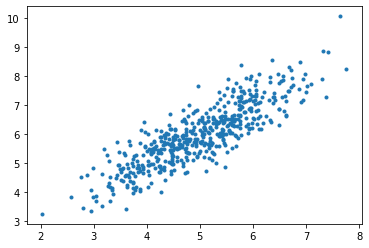

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)
 
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker='.')
plt.show()
 
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))
 
split_factor = 0.90
split = int(split_factor * data.shape[0])
 
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))

In [ ]:
x_torch=torch.from_numpy(X_train)
y_torch=torch.from_numpy(y_train)


In [ ]:
class TorchLinear(torch.nn.Module):
    def __init__(self,input_dim,units) :
        super(TorchLinear,self).__init__()
        
        self.linear=torch.nn.Linear(input_dim,units)
    def __call__(self,Xb):
        return self.linear(Xb)
        

In [ ]:
model=TorchLinear(X_train.shape[1],1)


In [ ]:
train_tensor_x=torch.from_numpy(X_train)
train_tensor_y=torch.from_numpy(y_train)
test_tensor_x=torch.from_numpy(X_test)
test_tensor_y=torch.from_numpy(y_test)



    
    

In [ ]:
from random import shuffle


train_data=TensorDataset(train_tensor_x,train_tensor_y)
train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_data=TensorDataset(test_tensor_x,test_tensor_y)
test_loader=DataLoader(test_data)


In [ ]:
def createMIniBatch(X,y,batch_size=32):
    batch_size=32
   
    minibatches=[]

    data=np.hstack((X,y))
    np.random.shuffle(data)
    n_mini_batches=data.shape[0]//batch_size
    for i in range(n_mini_batches):
        minibatch=data[i*batch_size:(i+1)*batch_size,:]
        X_mini=minibatch[:,:-1]
        y_mini=minibatch[:,-1].reshape((-1,1))
        minibatches.append((X_mini,y_mini))
    minibatches=minibatches[:-1]  
    return minibatches

 
    
    
    
    
    



In [ ]:
criterian=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)


In [ ]:
#Gradient Descent

train_loader=DataLoader(train_data,batch_size=X_train.shape[0],shuffle=True)

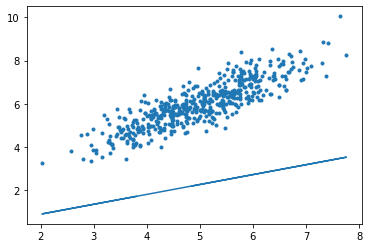

In [ ]:
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],model(torch.tensor(X_train[:500,:],dtype=torch.float32)).detach().numpy())

In [ ]:
def Gradientupdate(train_loader):
    for i ,(Xbatch,ybatch) in enumerate(train_loader):
        predict=model(torch.tensor(Xbatch,dtype=torch.float32))
        loss_value=criterian(predict,ybatch.float())
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
    return loss_value


    
        
    

In [ ]:
def Gradient_fit(loader,num_epochs):
    start=time.time()
    J_history=[]
    for epoch in range(num_epochs):
        
        train_loader=loader
        loss_value=Gradientupdate(train_loader)
        J_history.append(loss_value.item())
        
    end=time.time()
    print(end-start)    
    return J_history    
    
    
    
    
hist=Gradient_fit(train_loader,100)    

C:\Users\97466\AppData\Local\Temp\ipykernel_7736\2887641628.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predict=model(torch.tensor(Xbatch,dtype=torch.float32))


7.658204793930054


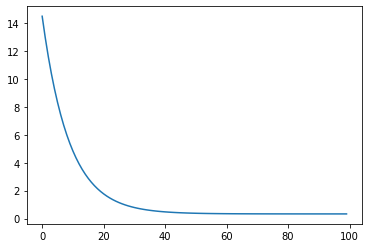

In [ ]:


plt.plot(hist)

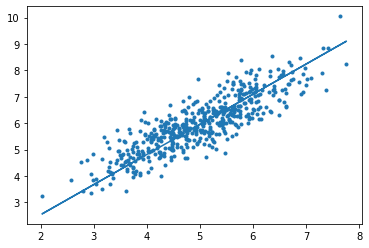

In [ ]:
plt.scatter(X_train[:500, 1], y_train[:500, 0], marker='.')
plt.plot(X_train[:500,1],model(torch.tensor(X_train[:500,:],dtype=torch.float32)).detach().numpy())

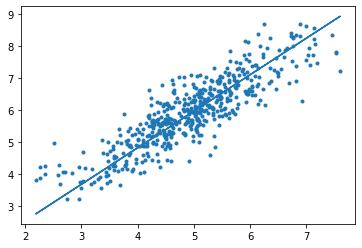

In [ ]:
plt.scatter(X_test[:500, 1], y_test[:500, 0], marker='.')
plt.plot(X_test[:500,1],model(torch.tensor(X_test[:500,:],dtype=torch.float32)).detach().numpy())